# Neural Networks Learning

## 1 Neural Networks

### 1.1 Visualizing the data

In [1]:
import scipy.io
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Setup the parameters you will use for this exercise
input_layer_size = 400   # input layer - each image of a digit is 20x20 pixels
hidden_layer_size = 25   # hidden layer - 25 units
num_labels = 10          # output layer - 10 labels, from 1 to 10, note "0" is labelled as 10

In [3]:
# Load training data
data = scipy.io.loadmat('data/ex4data1.mat')
data

{'X': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ..., 
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [4]:
# X is 5,000 examples of 20x20 pixel images, each image is a handwritten number
# Each 20x20 image is stored as a 400-dimensional vector
data['X'].shape

(5000, 400)

In [5]:
# y is the numeral represented by each image# y is  
data['y'].shape

(5000, 1)

In [6]:
# Store data in numpy arrays to make things easier
X = data['X']
y = data['y']

In [7]:
m = X.shape[0] # number of examples

In [8]:
# Randomly select 100 images to display
rand_indices = np.random.permutation(m)
sel = X[rand_indices[0:100], :]

In [9]:
def display_data(X):
    '''
    Displays 2D data stored in X in a nice grid.
    '''
    m = X.shape[0] # number of images
    display_rows = math.floor(math.sqrt(m))
    display_cols = math.ceil(m / display_rows)
    n = X.shape[1] # pixels per image
    image_side = int(math.sqrt(n))
    
    plt.figure(figsize=(8,8))
    
    for i in range(m):
        image = X[i]
        image = np.reshape(image, (image_side, image_side), order='F')
        plt.subplot(display_rows, display_cols, i+1)
        plt.imshow(image, cmap='Greys')
        plt.axis('off')
        
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

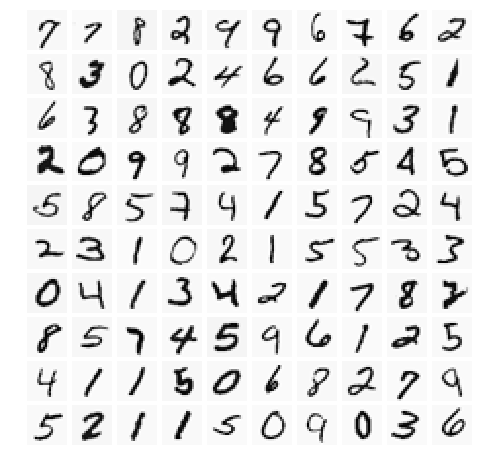

In [10]:
display_data(sel)

### 1.2 Model representation

In [11]:
# Load pre-initialized weights into variables Theta1 and Theta2
weights = scipy.io.loadmat('data/ex4weights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

In [12]:
Theta1.shape
# 20x20 pixels = 400 + 1 bias unit -> 401 input units
# Second (hidden) layer has 25 units

(25, 401)

In [13]:
Theta2.shape
# Second layer's 25 units + 1 bias unit
# Output layer has 10 units for 0-9

(10, 26)

In [14]:
# Unroll parameters 
nn_params = np.append(Theta1.flatten(order='F'), Theta2.flatten(order='F'))

### 1.3 Feedforward and cost function

In [15]:
def sigmoid(z):
    g = 1. / (1. + math.exp(-z))
    return g

sigmoid = np.vectorize(sigmoid)

In [16]:
def NN_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda):
    '''
    Computes the cost and gradient for a two layer
    neural network which performs classification.
    '''
    
    J = 0

    # Reshape nn_params back into weight matrices Theta1 and Theta2
    Theta1 = np.reshape(nn_params[:(hidden_layer_size * (input_layer_size + 1))],
                        (hidden_layer_size, (input_layer_size + 1)), order='F')

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size + 1)), order='F')

    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)    

    m = X.shape[0] # number of examples


    ## Feedforward neural network
    # Add column of ones to X for bias
    X = np.column_stack((np.ones(m), X))
    
    # Calculate outputs of hidden layer
    z2 = np.dot(X, Theta1.T)
    a2 = sigmoid(z2)
    
    # Add column of ones to hidden layer output for bias
    a2 = np.column_stack((np.ones(a2.shape[0]), a2))
    
    # Calculate outputs of hidden layer
    z3 = np.dot(a2, Theta2.T)
    a3 = sigmoid(z3)
    
    
    ## Compute cost
    J1 = 0
    J2 = 0
    
    for i in range(m): # loop over examples
        # Logical version of y
        y_bools = np.zeros(num_labels)
        y_bools[y[i]-1] = 1 # -1 because y runs from 1-10 but num_labels runs from 0-9

        J1 += np.sum(-y_bools*np.log(a3[i,:]) - (1 - y_bools)*np.log(1 - a3[i,:]))
    J1 = J1/m
    
    J2 = np.sum(Theta1[:, 1:]**2) + np.sum(Theta2[:, 1:]**2)
    J2 = J2 * Lambda / (2*m)
    
    J = J1 + J2


    # Unroll gradients
    grad = np.append(Theta1_grad.flatten(order='F'), Theta2_grad.flatten(order='F'))
    
    return J

In [17]:
# Test cost function works with no regularisation
Lambda = 0

J = NN_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)

print('Cost: %f' %J)
print('Expected cost: 0.287629')

Cost: 0.287629
Expected cost: 0.287629


In [18]:
# Test cost function works with regularisation
Lambda = 1

J = NN_cost_function(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)

print('Cost: %f' %J)
print('Expected cost: 0.383770')

Cost: 0.383770
Expected cost: 0.383770


## 2 Backpropagation